<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Analysis - 캘리포니아 주택가격 데이터
#### 1. 데이터 확인


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
california_dt = california.data # 독립변수 만으로 된 numpy 형태
price = california.target # 종속변수 값을 numpy 형태

df = pd.DataFrame(california_dt, columns = california.feature_names)
df['PRICE'] = price

In [3]:
# head 확인
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


변수 구분과 내용
  - MedInc (중간 소득) : 중간 소득.  
  - HouseAge (주택 연식) : 주택의 중간 연식.  
  - AveRooms (평균 방 개수) : 주택 내의 평균 방 개수.  
  - AveBedrms (평균 침실 개수) : 주택 내의 평균 침실 개수.  
  - Population (인구) : 해당 지역의 인구 수.  
  - AveOccup (평균 자가 비율) : 주택의 평균 자가 비율.  
  - Latitude (위도) : 주택의 위도.  
  - Longitude (경도) : 주택의 경도.  
  - MedHouseVal (중간 주택 가격) : 중간 주택 가격(타겟 변수).  

In [4]:
# 데이터 형태 확인
df.shape

(20640, 9)

In [5]:
# 데이터 타입과 null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

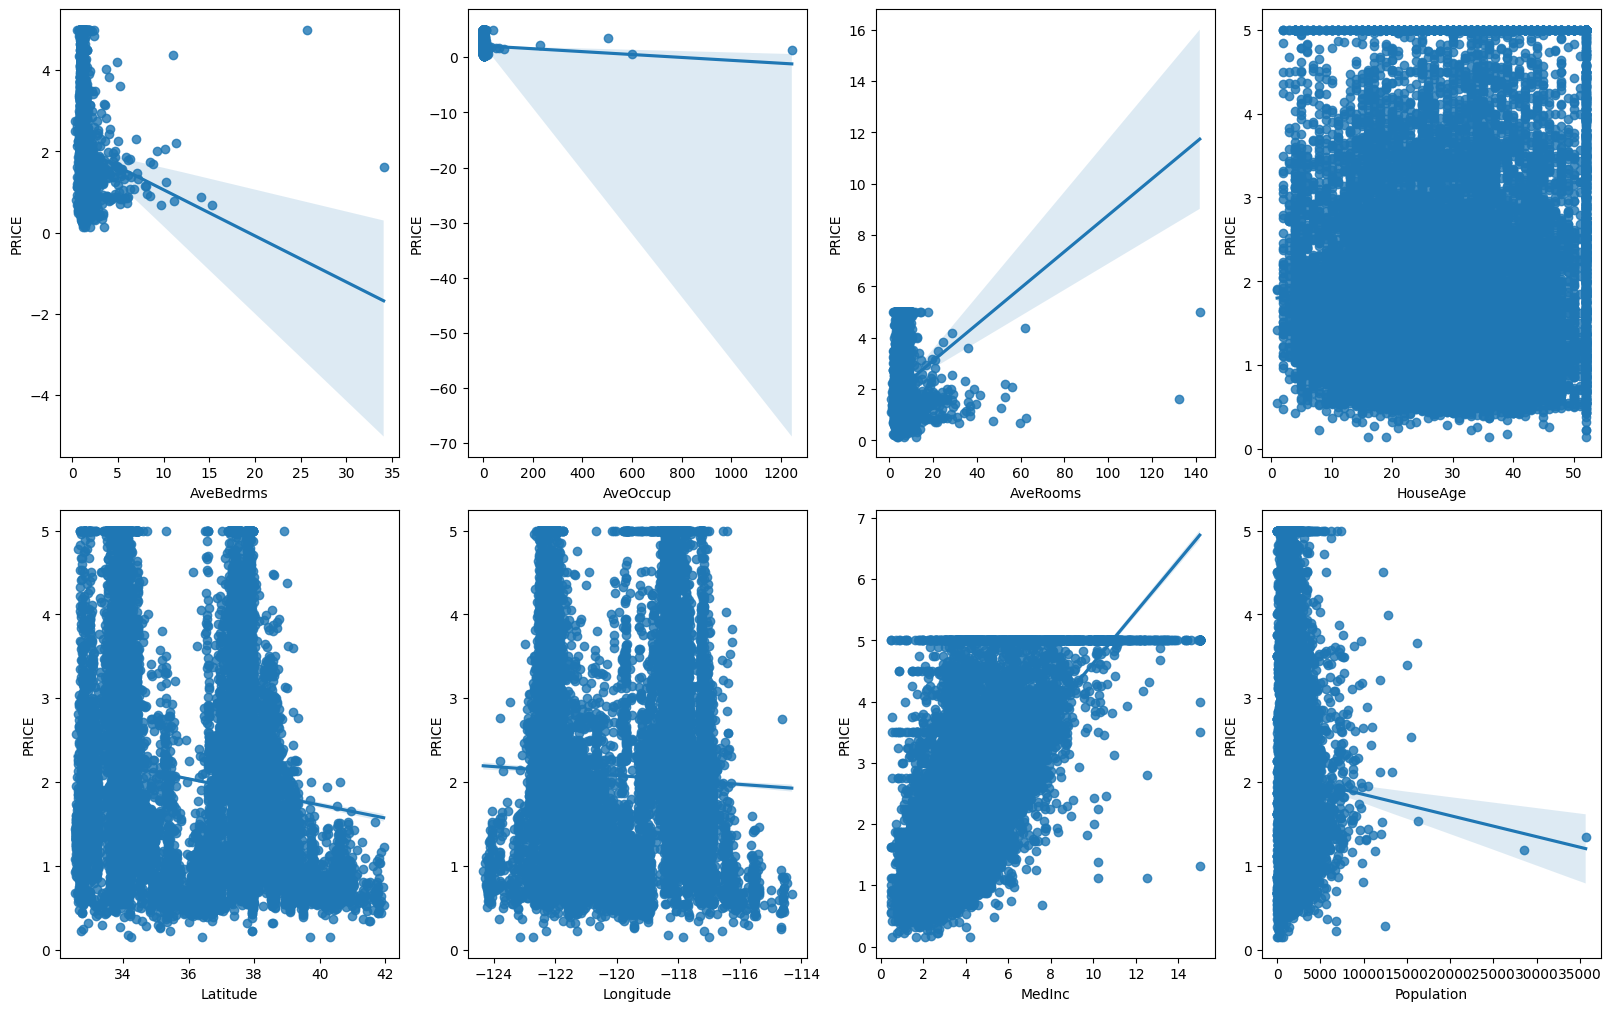

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 2,
                        constrained_layout = True)
features = df.columns.difference(['PRICE'])

for i, feature in enumerate(features) :
  # enumerate를 더 많이 사용. 컬럼의 인덱스를 알아야 할 때 유용
  # enumerate를 사용하면 각 컬럼의 인덱스와 함께 컬럼에 직접 접근 가능
  row = int(i / 4)
  col = i % 4

  # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
  sns.regplot(x = feature, y = df['PRICE'], data = df, ax = axs[row][col])

#### 2. 데이터 분할

In [8]:
df.columns.tolist()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'PRICE']

In [9]:
from sklearn.model_selection import train_test_split

x = df[['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']].values
y = df['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 94)

In [10]:
print('학습데이터세트 PRICE 평균 : ', y_train.mean())
print('평가데이터세트 PRICE 평균 : ', y_test.mean())

학습데이터세트 PRICE 평균 :  2.0669402598110467
평가데이터세트 PRICE 평균 :  2.0750298062015506


#### 3. 전처리

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Mim-max 정규화
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

#### 4. 모델학습

In [12]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE : {0: .5f}'.format(mae))
print('MSE : {0: .5f}'.format(mse))
print('RMSE : {0: .5f}'.format(rmse))
print('R2 : {0: .5f}'.format(r2))

MAE :  0.53156
MSE :  0.52669
RMSE :  0.72574
R2 :  0.60347


#### 5. 성능평가 및 예측값 저장

In [16]:
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [17]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE : {0: .5f}'.format(mae))
print('MSE : {0: .5f}'.format(mse))
print('RMSE : {0: .5f}'.format(rmse))
print('R2 : {0: .5f}'.format(r2))

MAE :  0.53239
MSE :  0.51657
RMSE :  0.71873
R2 :  0.61585


In [19]:
# 데이터프레임으로 변환

pred_df = pd.DataFrame(pred, columns = ['pred Price'])
pred_df.head()

,pred Price
0,1.192823
1,3.530811
2,3.027870
3,2.266657
4,1.593141


In [20]:
actual = pd.DataFrame(y_test, columns = ['actual Price'])
actual.head()

,actual Price
0,0.807
1,3.921
2,2.784
3,2.042
4,1.403


In [23]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# 병합 및 저장
reg_result = pd.concat([actual, pred_df], axis = 1)
file_path = '/content/drive/MyDrive/Colab Notebooks/reg_result.csv'
reg_result.to_csv(file_path, index = False, encoding = 'utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,0.807,1.192823
1,3.921,3.530811
2,2.784,3.027870
3,2.042,2.266657
4,1.403,1.593141
